In [40]:
from datetime import datetime as dt
from arcgis.gis import GIS
from arcgis.geoanalytics.analyze_patterns import forest, glr
gis = GIS('https://ndhagsb01.esri.com/portal', 
          'admin', 
          'esri.agp2', 
          profile="your_enterprise_portal", verify_cert=False)

In [41]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt

import arcgis
import arcgis.geoanalytics
from arcgis.gis import GIS

from arcgis.geoanalytics.manage_data import run_python_script
from arcgis.geoanalytics.analyze_patterns import forest, glr
from arcgis.geoanalytics.summarize_data import describe_dataset

In [42]:
import arcgis
arcgis.env.verbose = True

In [55]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://ndhga01.esri.com:6443/arcgis/admin>

In [72]:
data_item = bigdata_datastore_manager.add_bigdata("pm2017_4326", r"\\DELDEVD014\pm2017")

Created Big Data file share for pm2017_4326


In [56]:
bigdata_fileshares = bigdata_datastore_manager.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/air_quality_2017_18_19" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/air_quality_2019" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ChicagoCrime_2001_2020" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/pm2017" type:"bigDataFileShare">]

In [57]:
file_share_folder = bigdata_fileshares[-1]

In [58]:
manifest = file_share_folder.manifest
manifest

{'datasets': [{'name': 'data',
   'format': {'quoteChar': '"',
    'fieldDelimiter': ',',
    'hasHeaderRow': True,
    'encoding': 'UTF-8',
    'escapeChar': '"',
    'recordTerminator': '\n',
    'type': 'delimited',
    'extension': 'csv'},
   'schema': {'fields': [{'name': 'State Code',
      'type': 'esriFieldTypeBigInteger'},
     {'name': 'County Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Site Num', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Parameter Code', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'POC', 'type': 'esriFieldTypeBigInteger'},
     {'name': 'Latitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Longitude', 'type': 'esriFieldTypeDouble'},
     {'name': 'Datum', 'type': 'esriFieldTypeString'},
     {'name': 'Parameter Name', 'type': 'esriFieldTypeString'},
     {'name': 'Date Local', 'type': 'esriFieldTypeString'},
     {'name': 'Time Local', 'type': 'esriFieldTypeString'},
     {'name': 'Date GMT', 'type': 'esriFieldTypeString'},


In [59]:
manifest['datasets'][0]['geometry']['spatialReference'] = { "wkid": 102100, "latestWkid": 3857 }

In [60]:
file_share_folder.manifest = manifest

In [76]:
search_result = gis.content.search("bigDataFileShares_pm2017_4326", item_type = "big data file share", max_items=40)
search_result

[<Item title:"bigDataFileShares_pm2017_4326" type:Big Data File Share owner:admin>]

In [77]:
data = search_result[0]

In [78]:
data

<Item title:"bigDataFileShares_pm2017_4326" type:Big Data File Share owner:admin>

In [79]:
air_lyr = data.layers[0]

In [80]:
air_lyr.properties

{
  "dataStoreID": "212e15e6-1870-493f-bfe4-3f83e0a74a30",
  "fields": [
    {
      "name": "State Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "County Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Site Num",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Parameter Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "POC",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Latitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Longitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Datum",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Parameter Name",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Time Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date GMT",
      "type": "esriFieldTypeString"
    },
    {
  

In [49]:
counties = gis.content.get('10308a3e7dd7424592a1e3c648ac37b0')

<Item title:"usaCounties" type:Feature Layer Collection owner:admin>
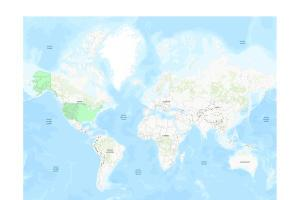

In [66]:
counties

In [67]:
boundary = counties.layers[0]

In [69]:
boundary.properties

{
  "currentVersion": 10.8,
  "cimVersion": "2.5.0",
  "id": 0,
  "name": "usaCounties",
  "type": "Feature Layer",
  "parentLayer": null,
  "defaultVisibility": true,
  "minScale": 0,
  "maxScale": 0,
  "canScaleSymbols": false,
  "geometryType": "esriGeometryPolygon",
  "description": "",
  "copyrightText": "",
  "editFieldsInfo": null,
  "syncCanReturnChanges": true,
  "relationships": [],
  "isDataVersioned": false,
  "isDataArchived": false,
  "isDataBranchVersioned": false,
  "isCoGoEnabled": false,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSQL": true,
  "supportsCoordinatesQuantization": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "advancedQueryCapabilities": {
    "supportsReturningQueryExtent": true,
    "supportsStatistics": true,
    "supportsDistinct": true,
    "supportsPagination": true,
    "supportsOrderBy": true,
    "supportsQueryWithDistance": true,
    

In [81]:
def average():
    from datetime import datetime as dt
    df = layers[0]
    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')
    res = geoanalytics.join_features(target_layer=layers[1], 
                                     join_layer=df, 
                                     join_operation="JoinOneToOne",
                                     summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}],
                                     spatial_relationship='Contains')
    res.write.format("webgis").save("average_pm_by_boundaryFinal" + str(dt.now().microsecond))

In [82]:
run_python_script(average, [air_lyr, boundary])

Submitted.
Executing...
Executing (RunPythonScript): RunPythonScript "def average():\n    from datetime import datetime as dt\n    df = layers[0]\n    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')\n    res = geoanalytics.join_features(target_layer=layers[1], \n                                     join_layer=df, \n                                     join_operation="JoinOneToOne",\n                                     summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}],\n                                     spatial_relationship='Contains')\n    res.write.format("webgis").save("average_pm_by_boundaryFinal" + str(dt.now().microsecond))\n\naverage()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_pm2017_4326/BigDataCatalogServer/data;https://ndhagsb01.esri.com/gis/rest/services/Hosted/usaCounties/FeatureServer/0 "{"defaultAggregationStyles": false}"
Start Time: Thu Mar 26 12:15:18 2020
Using URL based G

[{'type': 'esriJobMessageTypeInformative',
  'description': 'Executing (RunPythonScript): RunPythonScript "def average():\\n    from datetime import datetime as dt\\n    df = layers[0]\\n    df = df.filter(df[\'Parameter Name\'] == \'PM2.5 - Local Conditions\')\\n    res = geoanalytics.join_features(target_layer=layers[1], \\n                                     join_layer=df, \\n                                     join_operation="JoinOneToOne",\\n                                     summary_fields=[{\'statisticType\' : \'mean\', \'onStatisticField\' : \'Sample Measurement\'}],\\n                                     spatial_relationship=\'Contains\')\\n    res.write.format("webgis").save("average_pm_by_boundaryFinal" + str(dt.now().microsecond))\\n\\naverage()" https://ndhga01.esri.com/gis/rest/services/DataStoreCatalogs/bigDataFileShares_pm2017_4326/BigDataCatalogServer/data;https://ndhagsb01.esri.com/gis/rest/services/Hosted/usaCounties/FeatureServer/0 "{"defaultAggregationStyles": 

In [39]:
from arcgis.geoanalytics.summarize_data import join_features

In [ ]:
join_features(target_layer=boundary, 
              join_layer=air_lyr, 
              join_operation="JoinOneToMany",
              summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}],
              spatial_relationship='Contains')

In [ ]:
join_fields=[{ 'action' : 'rename', 'field' : 'Sample Measurement', 'to' : 'pm25'}],                                     
summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}]

In [83]:
avg = gis.content.search('average_pm_by_boundaryFinal')[0].layers[0]

In [84]:
avg

<FeatureLayer url:"https://ndhagsb01.esri.com/gis/rest/services/Hosted/average_pm_by_boundaryFinal671168/FeatureServer/0">

In [85]:
m = gis.map('usa')
m

MapView(layout=Layout(height='400px', width='100%'))

In [37]:
m.add_layer(avg)
m.zoom_to_layer(avg)

In [86]:
df = avg.query(as_df=True)

successfully plotted classedolor

calulate AQI